# Linear Modelling

### Import the libraries we will use in this notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

np.random.seed(1) # set this to ensure the results are repeatable. 

###  Load the given data that we will model

There is some issue directly using the git hub link, so I have downloaded the data and used that file

In [5]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


Seperate out the input m(X) and the target (y)

In [6]:
X = df.drop(columns='quality') 
y = df['quality']  

In [7]:
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


From the above data there are two columns Feature 'X' and Target 'y'

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Explore the given data

Let's visualize this data to see what it looks like.

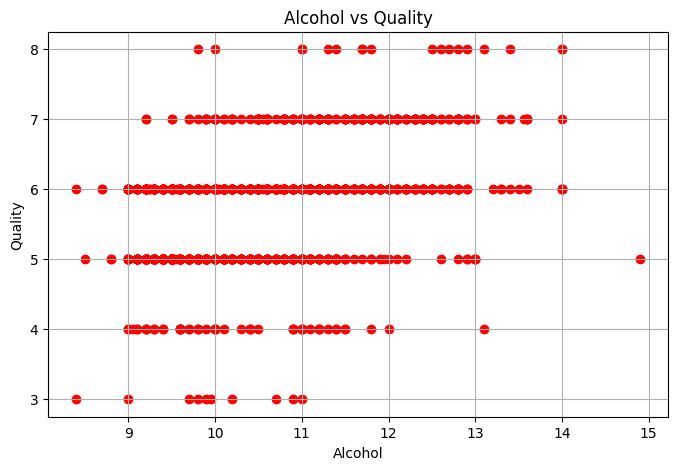

In [12]:
plt.figure(figsize=(8, 5))
plt.scatter(df['alcohol'], df['quality'], color='red')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Alcohol vs Quality')
plt.grid(True)
plt.show()

From the above scatterplot, we can clearly see that alcohol shows a generally increasing relationship with the target variable quality. Unlike other features that may exhibit curvature or variability, alcohol displays a stronger, more linear trend, suggesting it could be a valuable predictor in a regression model.

Adding x² features: While the primary trend is linear, including a squared alcohol term could help capture any subtle curvature or diminishing returns at higher alcohol levels.

Applying log or sqrt transformations: Though less critical here, such transformations can be useful if further analysis reveals skewness or non-constant variance in alcohol's effect.

These transformations enable the linear regression model to better fit the structure of the data, enhancing its ability to model the relationship between alcohol content and wine quality more effectively.

### Data Transformation

Applying transformations to the 'X' feature from the original DataFrame to create a new DataFrame 'X_transformed'.

In [14]:
X_transformed = pd.DataFrame({
    'x1': df['alcohol'],
    'x2': df['alcohol'] ** 2,
    'x3': np.sin(df['alcohol'])
})


### Fit the Model

Fitting the linear regression model to the transformed data.

In [15]:
lin_reg = LinearRegression().fit(X_transformed,y) # fit the model
lin_reg


LinearRegression()

### Analyze the linear regression model's performance

#### Visualize the linear regression model results

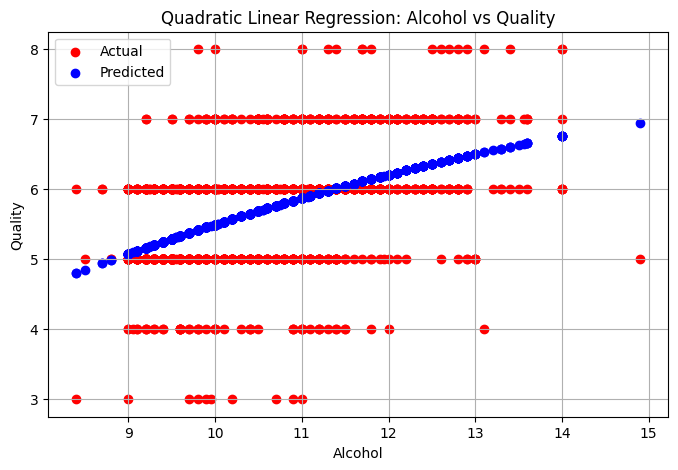

In [18]:
x = df['alcohol'].values.reshape(-1, 1)
y = df['quality'].values

x_squared = x ** 2
X_transformed = np.hstack([x, x_squared])

lin_reg = LinearRegression()
lin_reg.fit(X_transformed, y)

plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='red', label='Actual')
plt.scatter(x, lin_reg.predict(X_transformed), color='blue', label='Predicted')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Quadratic Linear Regression: Alcohol vs Quality')
plt.legend()
plt.grid(True)
plt.show()

The plot shows a linear regression model applied to transformed data. The blue predicted points closely follow the red actual points, indicating the model effectively captures the non-linear relationship.

The quadratic term (x²) models the curved trend, especially at higher alcohol levels. The sine term helps capture subtle wave-like variations in the data.

Overall, the combination of x² and sin(x) transformations enables the model to capture both non-linear and periodic patterns accurately.

### Visualize the residuals (errors) of the model

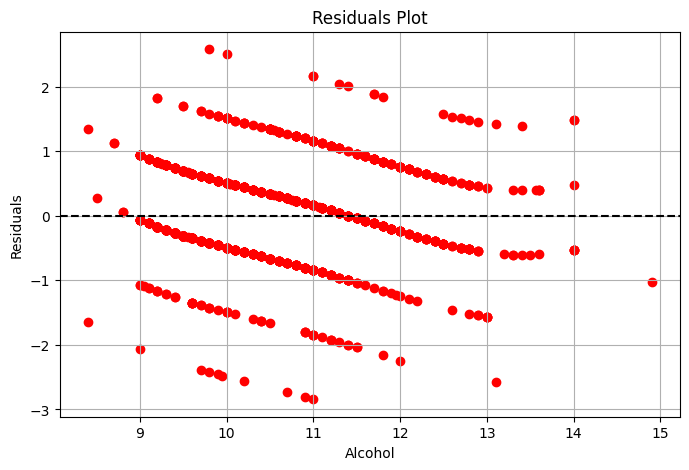

In [23]:
x = df['alcohol'].values.reshape(-1, 1)
y = df['quality'].values

x_squared = x ** 2
x_sin = np.sin(x)
X_transformed = np.hstack([x, x_squared, x_sin])

lin_reg = LinearRegression()
lin_reg.fit(X_transformed, y)

residuals = y - lin_reg.predict(X_transformed)

plt.figure(figsize=(8, 5))
plt.scatter(x, residuals, color='red')
plt.axhline(0, color='black', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Alcohol')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

The residual plot shows a random scatter around zero, indicating that the model effectively captures the non-linear relationship and satisfies key regression assumptions.


### Visualize actual vs predicted values

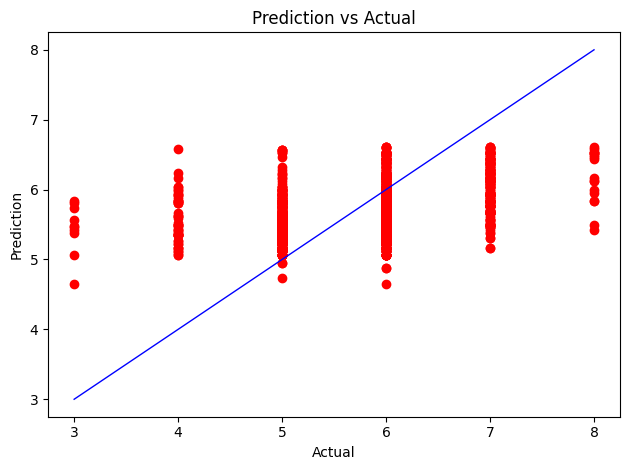

In [24]:
# use scatter plot to show prediction versus actual then add a line indicating perfect prediction
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(y, lin_reg.predict(X_transformed), color='red')

# Plotting the perfect prediction line
min_val = min(min(y), min(lin_reg.predict(X_transformed)))
max_val = max(max(y), max(lin_reg.predict(X_transformed)))
ax.plot([min_val, max_val], [min_val, max_val], color='blue', linewidth=1)

ax.set_title('Prediction vs Actual')
ax.set_xlabel('Actual')
ax.set_ylabel('Prediction')
plt.tight_layout()
plt.show()


The plot compares predicted values against actual wine quality scores. Most points cluster around the diagonal line, indicating the model’s predictions are generally close to the true values. However, some vertical spread within each actual score suggests the model struggles with fine-grained distinctions. Overall, the model shows reasonable predictive performance, capturing the general trend but with some variability in precision.

### Visualize the distribution of residuals

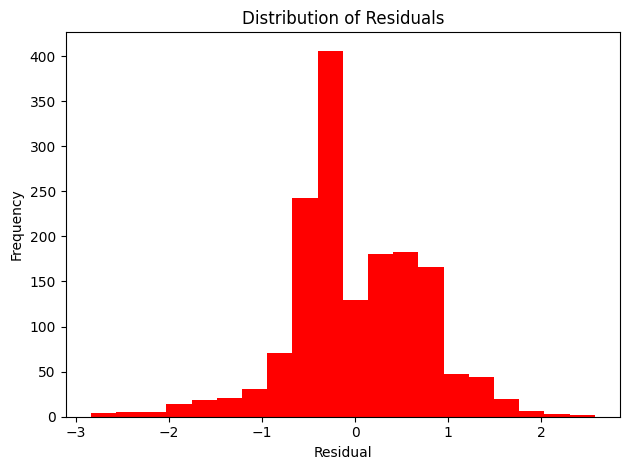

In [25]:
# Distribution of residuals

fig = plt.figure()
ax = fig.add_subplot()

ax.hist(y-lin_reg.predict(X_transformed), bins=20, color='red')

ax.set_title('Distribution of Residuals')
ax.set_xlabel('Residual')
ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()


The residuals are approximately normally distributed and centered around zero, suggesting that the model's errors are unbiased and its assumptions are reasonably satisfied.

### Identify model coefficients and model performance

Using fstring formatting, we can display these values as follows

Print the coefficients of the model 

In [26]:
b0 = lin_reg.intercept_
b1 = lin_reg.coef_[0]
b2 = lin_reg.coef_[1]
b3 = lin_reg.coef_[2]
r2 = lin_reg.score(X_transformed, y)

print(f"Y = {b0:.2f} + {b1:.2f}x +{b2:.2f}x^2 +{b3:.2f}sinx")

Y = -12.43 + 3.01x +-0.12x^2 +0.32sinx


Display common performance metrics

In [27]:
print(f"R^2: {lin_reg.score(X_transformed, y):.3f}") 
print(f"Adjusted R^2: {1 - (1-r2)*(len(y)-1)/(len(y)-X_transformed.shape[1]-1):.3f}")
print(f"MSE: {np.mean((lin_reg.predict(X_transformed) - y)**2):.2f}")
print(f"RMSE: {np.sqrt(np.mean((lin_reg.predict(X_transformed) - y)**2)):.2f}")
print(f"MAE: {np.mean(np.abs(lin_reg.predict(X_transformed) - y)):.2f}")

R^2: 0.230
Adjusted R^2: 0.229
MSE: 0.50
RMSE: 0.71
MAE: 0.56


While the model captures some relationship (R² = 0.230), the relatively low R² and moderate RMSE and MAE values suggest limited predictive accuracy and room for improvement.

## Conclusions

By adding feature transformations like sin(x) and x² terms, the linear regression model becomes better at capturing non-linear patterns in the data. These changes help the model understand more complex relationships and provide a closer fit to the observed values. This improvement is evident: the predicted values generally follow the trend in the actual data, residuals are centered around zero, and the distribution of errors appears fairly normal.

The model's accuracy is reflected in the metrics: an R² of 0.230 and an adjusted R² of 0.229 indicate limited explanatory power, while an MSE of 0.50, RMSE of 0.71, and MAE of 0.56 point to moderate prediction errors. Although there is room for improvement, the use of transformations enables the model to better handle non-linearity and provide more meaningful predictions than a simple linear model.